# Model `BinaryMFPenaltyExSigmoid`

In [11]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 4
[I] seed         : 1719330415
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


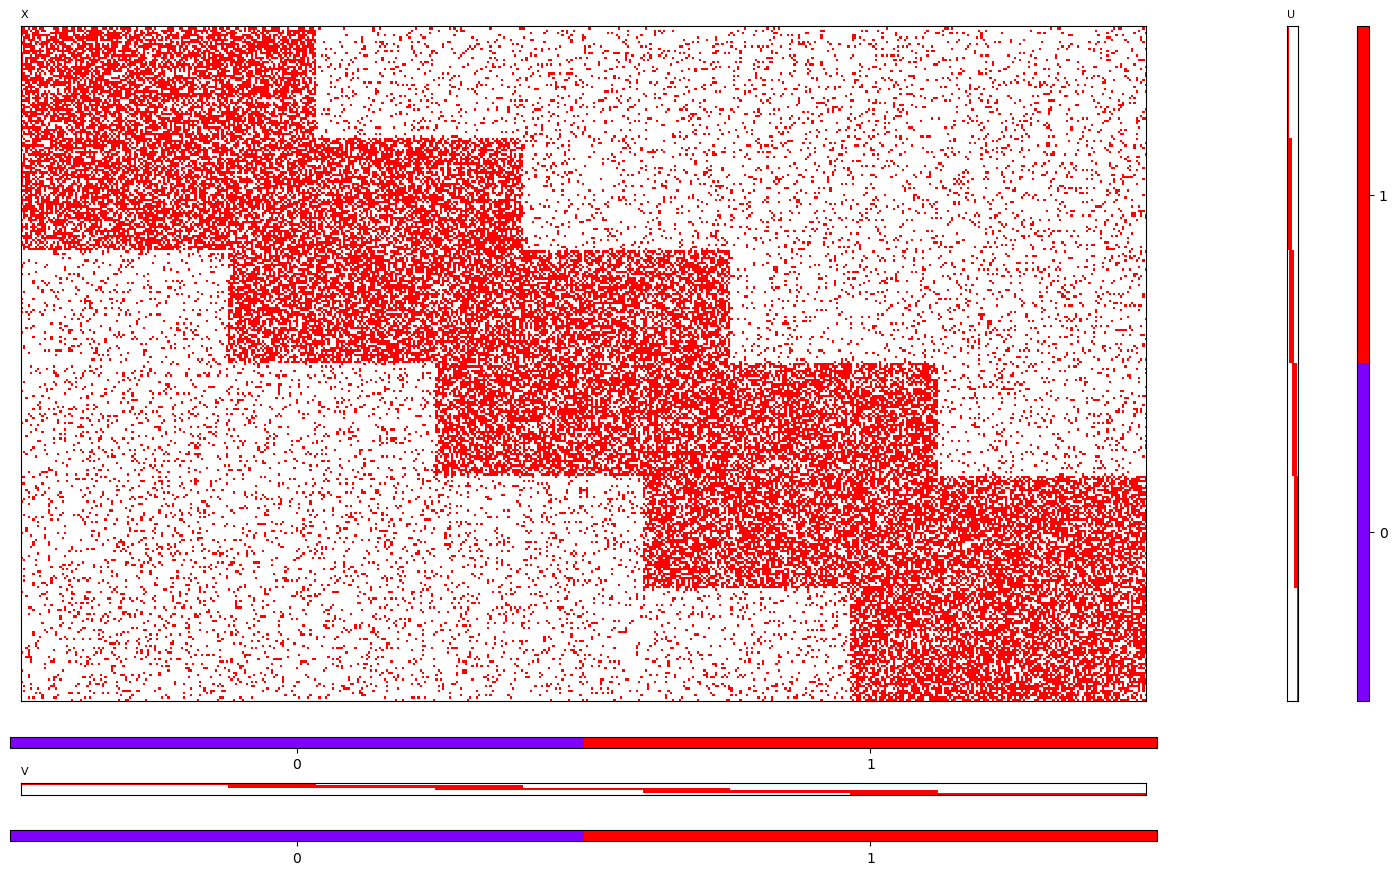

<Figure size 640x480 with 0 Axes>

In [12]:
from generators import BlockDiagonalMatrixGenerator

n_row, n_col, k, seed = 300, 500, 5, None

data = BlockDiagonalMatrixGenerator(m=n_row, n=n_col, k=k, overlap=[0.5, 0.3, 0.5, 0.3])
data.generate(seed=seed) # if no seed assigned, use time instead

data.add_noise(noise=[0.4, 0.1], seed=2000)
data.show_matrix()

In [13]:
# from datasets import MovieLensData

# data = MovieLensData(size="100k")
# data.load()

# idx = data.sample(factor_id=0, n_samples=300, seed=1000)
# idx = data.sample(factor_id=1, n_samples=500, seed=1000)

In [14]:
from datasets import RatioSplit

split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split.negative_sample(
    train_size=split.pos_train_size, 
    val_size=split.pos_val_size, 
    test_size=split.pos_test_size, 
    seed=2023, type='popularity')

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 32376
[I]   val_size     : 4626
[I]   test_size    : 9251
[I]   seed         : 1997
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 103747
[I]   n_negatives  : 46253
[I]   train_size   : 32376
[I]   val_size     : 4626
[I]   test_size    : 9251
[I]   seed         : 2023


In [15]:
X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

# 0. Prepare initial U, V

[I] k            : 5
[I] U            : None
[I] V            : None
[I] beta_loss    : frobenius
[I] init_method  : nndsvd
[I] solver       : cd
[I] tol          : 0.0001
[I] max_iter     : 1000
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.


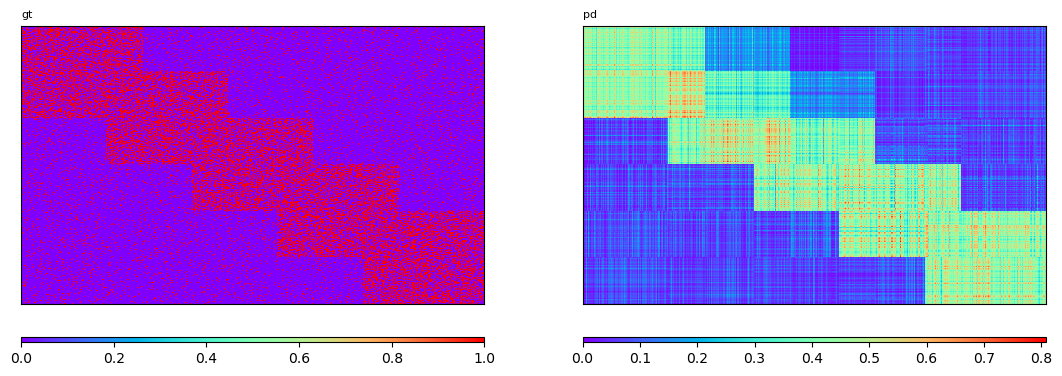

[I] model saved as: 24-06-25_23-46-57_NMFSklearn.pickle


<Figure size 640x480 with 0 Axes>

In [16]:
from models import NMFSklearn

k = 5

model_nmf = NMFSklearn(k=k, init_method='nndsvd', max_iter=1000, seed=2024)
model_nmf.fit(X_train=X_train)

In [19]:
# init U and V
U, V = model_nmf.U, model_nmf.V

# params for BinaryMFPenalty
k = 5
reg = 1
reg_growth = 1.2
W = 'full'

# params for BinaryMFThresholdExSigmoid
u, v = 0.1, 0.1

# 1. `BinaryMFPenalty` + `BinaryMFThresholdExSigmoid`

Since the regularizer `reg` grows at a rate of `reg_growth`， the total `error` might be constantly increasing. The `reg_error` is decreasing and is considered the convergence indicator.

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] reg          : 1
[I] beta_loss    : frobenius
[I] solver       : mu
[I] reg_growth   : 1.2
[I] max_reg      : 10000000000.0
[I] tol          : 0.1
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] init_method  : custom
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : prediction
[I] verbose      : True
[I] display      : True
[I] Normalized U: [0.0, 1.494447692771423] -> [0.0, 1.0], V: [0.0, 0.9964525111087748] -> [0.0, 0.9999999999999999]
[I] iter: 1, error: 1.07e+04, rec_error: 1.07e+04, reg: 1.00e+00, reg_error: 3.32e+01
[I] iter: 2, error: 1.01e+04, rec_error: 1.00e+04, reg: 1.20e+00, reg_error: 3.92e+01
[I] iter: 3, error: 1.01e+04, rec_error: 1.00e+04, reg: 1.44e+00, reg_error: 4.67e+01
[I] iter: 4, error: 1.01e+04, rec_error: 1.00e+04, reg: 1.73e+00, reg_error: 5.55e+01
[I] iter: 5, error: 1.01e+04, rec_error: 1.00e+04, reg: 2.07e+0

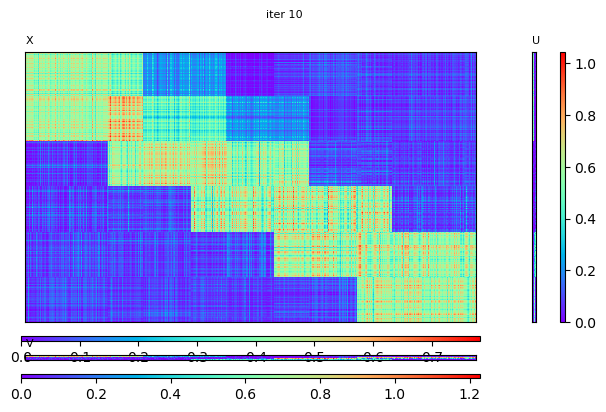

[I] iter: 11, error: 1.02e+04, rec_error: 1.00e+04, reg: 6.19e+00, reg_error: 1.82e+02
[I] iter: 12, error: 1.02e+04, rec_error: 1.00e+04, reg: 7.43e+00, reg_error: 2.13e+02
[I] iter: 13, error: 1.03e+04, rec_error: 1.00e+04, reg: 8.92e+00, reg_error: 2.50e+02
[I] iter: 14, error: 1.03e+04, rec_error: 1.00e+04, reg: 1.07e+01, reg_error: 2.93e+02
[I] iter: 15, error: 1.04e+04, rec_error: 1.00e+04, reg: 1.28e+01, reg_error: 3.41e+02
[I] iter: 16, error: 1.04e+04, rec_error: 1.00e+04, reg: 1.54e+01, reg_error: 3.96e+02
[I] iter: 17, error: 1.05e+04, rec_error: 1.01e+04, reg: 1.85e+01, reg_error: 4.59e+02
[I] iter: 18, error: 1.06e+04, rec_error: 1.01e+04, reg: 2.22e+01, reg_error: 5.30e+02
[I] iter: 19, error: 1.07e+04, rec_error: 1.01e+04, reg: 2.66e+01, reg_error: 6.11e+02
[I] iter: 20, error: 1.08e+04, rec_error: 1.01e+04, reg: 3.19e+01, reg_error: 7.02e+02


<Figure size 640x480 with 0 Axes>

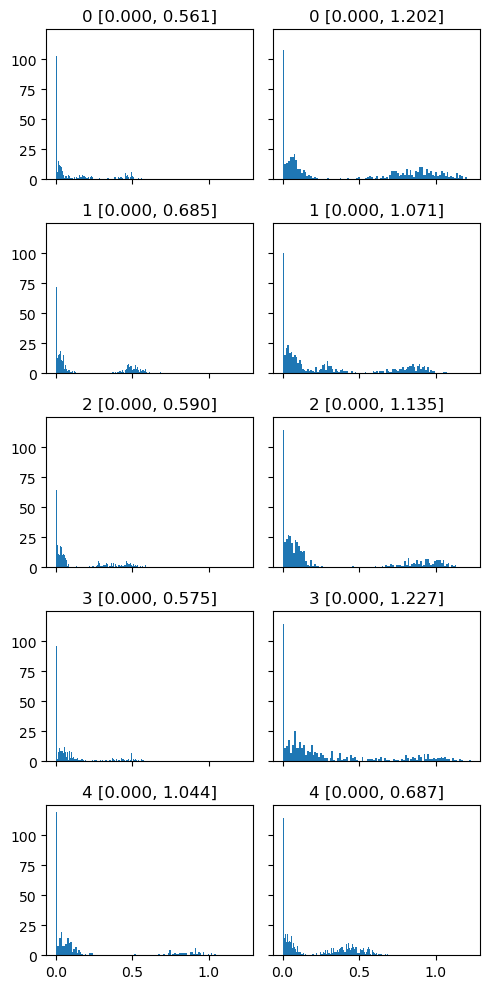

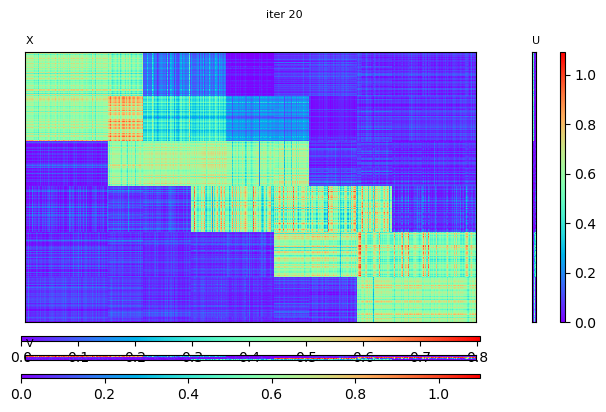

[I] iter: 21, error: 1.09e+04, rec_error: 1.01e+04, reg: 3.83e+01, reg_error: 8.04e+02
[I] iter: 22, error: 1.10e+04, rec_error: 1.01e+04, reg: 4.60e+01, reg_error: 9.19e+02
[I] iter: 23, error: 1.12e+04, rec_error: 1.01e+04, reg: 5.52e+01, reg_error: 1.05e+03
[I] iter: 24, error: 1.14e+04, rec_error: 1.02e+04, reg: 6.62e+01, reg_error: 1.19e+03
[I] iter: 25, error: 1.15e+04, rec_error: 1.02e+04, reg: 7.95e+01, reg_error: 1.35e+03
[I] iter: 26, error: 1.18e+04, rec_error: 1.02e+04, reg: 9.54e+01, reg_error: 1.53e+03
[I] iter: 27, error: 1.20e+04, rec_error: 1.03e+04, reg: 1.14e+02, reg_error: 1.72e+03
[I] iter: 28, error: 1.23e+04, rec_error: 1.03e+04, reg: 1.37e+02, reg_error: 1.94e+03
[I] iter: 29, error: 1.26e+04, rec_error: 1.04e+04, reg: 1.65e+02, reg_error: 2.16e+03
[I] iter: 30, error: 1.29e+04, rec_error: 1.05e+04, reg: 1.98e+02, reg_error: 2.40e+03


<Figure size 640x480 with 0 Axes>

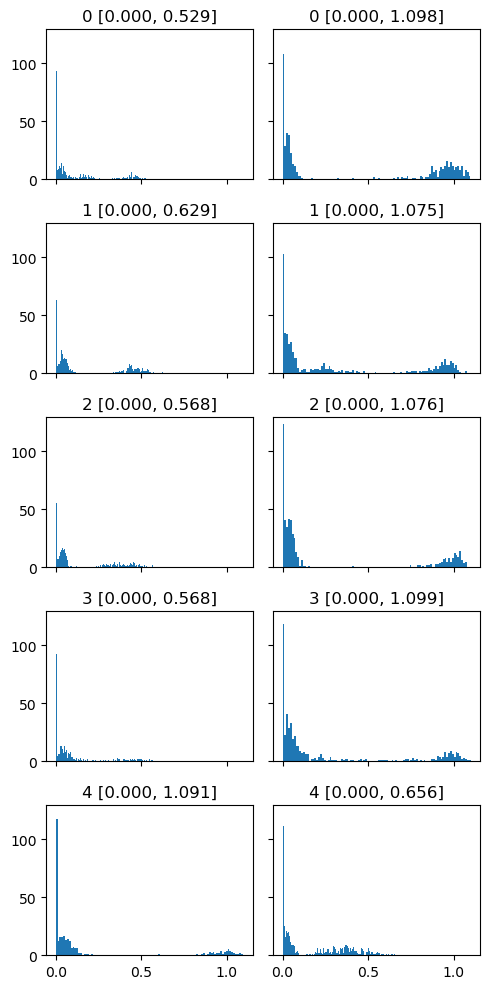

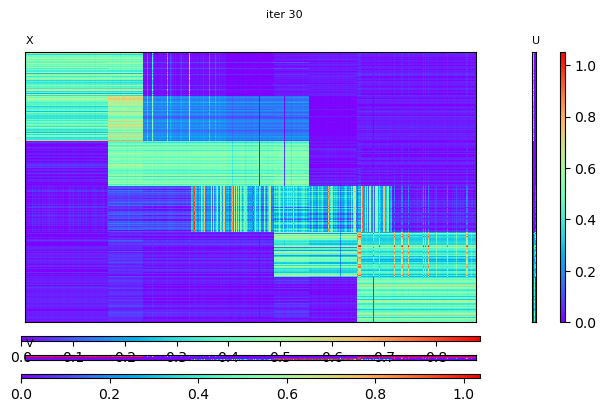

[I] iter: 31, error: 1.32e+04, rec_error: 1.06e+04, reg: 2.37e+02, reg_error: 2.65e+03
[W] Stopped in advance: Reach maximum iteration


\
                                                                     
                 time iter         error     rec_error         reg   
0   25/06/24 11:48:23    0  10728.588741  10692.242774    1.000000   
1   25/06/24 11:48:24    1  10725.394161  10692.242774    1.000000   
2   25/06/24 11:48:25    2  10067.006233  10027.757868    1.200000   
3   25/06/24 11:48:26    3  10074.593851  10027.934317    1.440000   
4   25/06/24 11:48:27    4  10083.639202  10028.142695    1.728000   
5   25/06/24 11:48:28    5  10094.383040  10028.400713    2.073600   
6   25/06/24 11:48:28    6  10107.120272  10028.732748    2.488320   
7   25/06/24 11:48:29    7  10122.191410  10029.167290    2.985984   
8   25/06/24 11:48:30    8  10139.985269  10029.740061    3.583181   
9   25/06/24 11:48:31    9  10160.941298  10030.496617    4.299817   
10  25/06/24 11:48:32   10  10185.551452  10031.495278    5.159780   
11  25/06/24 11:48:34   11  10214.361407  10032.810285    6.191736   
12  25/06/24 11:48:35   12  10247.971443  10034.535023    7.430084   
13  25/06/24 11:48:36   13  10287.037909  10036.785077    8.916100   
14  25/06/24 11:48:37   14  10332.276777  10039.700827   10.699321   
15  25/06/24 11:48:38   15  10384.471349  10043.449395   12.839185   
16  25/06/24 11:48:39   16  10444.486122  10048.226037   15.407022   
17  25/06/24 11:48:39   17  10513.287835  10054.255676   18.488426   
18  25/06/24 11:48:40   18  10591.972199  10061.796088   22.186111   
19  25/06/24 11:48:41   19  10681.791015  10071.145061   26.623333   
20  25/06/24 11:48:42   20  10784.170861  10082.654007   31.948000   
21  25/06/24 11:48:45   21  10900.714515  10096.749726   38.337600   
22  25/06/24 11:48:46   22  11033.182906  10113.964624   46.005120   
23  25/06/24 11:48:47   23  11183.465255  10134.974358   55.206144   
24  25/06/24 11:48:48   24  11353.542854  10160.636101   66.247373   
25  25/06/24 11:48:49   25  11545.429695  10192.008053   79.496847   
26  25/06/24 11:48:50   26  11761.054188  10230.346152   95.396217   
27  25/06/24 11:48:51   27  12002.066418  10277.111767  114.475460   
28  25/06/24 11:48:51   28  12269.674653  10334.017342  137.370552   
29  25/06/24 11:48:52   29  12564.776070  10403.123325  164.844662   
30  25/06/24 11:48:53   30  12888.293901  10486.956820  197.813595   
31  25/06/24 11:48:57   31  13241.050473  10588.585777  237.376314   

                    train                 val                test            
                        0                   0                   0            
      reg_error      RMSE       MAE      RMSE       MAE      RMSE       MAE  
0     36.345968  0.752486  0.744446  0.765100  0.757663  0.768251  0.760876  
1     33.151387  0.640716  0.619633  0.658457  0.639154  0.663057  0.643971  
2     39.248365  0.640677  0.619527  0.658336  0.638963  0.662932  0.643775  
3     46.659534  0.640740  0.619552  0.658338  0.638926  0.662933  0.643737  
4     55.496507  0.640801  0.619584  0.658341  0.638897  0.662939  0.643710  
5     65.982327  0.640870  0.619626  0.658348  0.638874  0.662949  0.643689  
6     78.387523  0.640954  0.619680  0.658363  0.638856  0.662967  0.643674  
7     93.024120  0.641059  0.619751  0.658388  0.638845  0.662997  0.643667  
8    110.245208  0.641192  0.619845  0.658430  0.638846  0.663045  0.643672  
9    130.444680  0.641362  0.619969  0.658495  0.638864  0.663117  0.643695  
10   154.056173  0.641580  0.620133  0.658592  0.638908  0.663222  0.643746  
11   181.551122  0.641860  0.620353  0.658732  0.638989  0.663373  0.643835  
12   213.436420  0.642221  0.620645  0.658931  0.639123  0.663584  0.643979  
13   250.252831  0.642685  0.621034  0.659210  0.639332  0.663878  0.644201  
14   292.575950  0.643280  0.621549  0.659596  0.639644  0.664282  0.644529  
15   341.021954  0.644041  0.622228  0.660122  0.640095  0.664831  0.645002  
16   396.260085  0.645009  0.623114  0.660830  0.640730  0.665568  0.645665  
17   459.032159  0.646233  0.624258  0.661771  0.641603  

<Figure size 640x480 with 0 Axes>

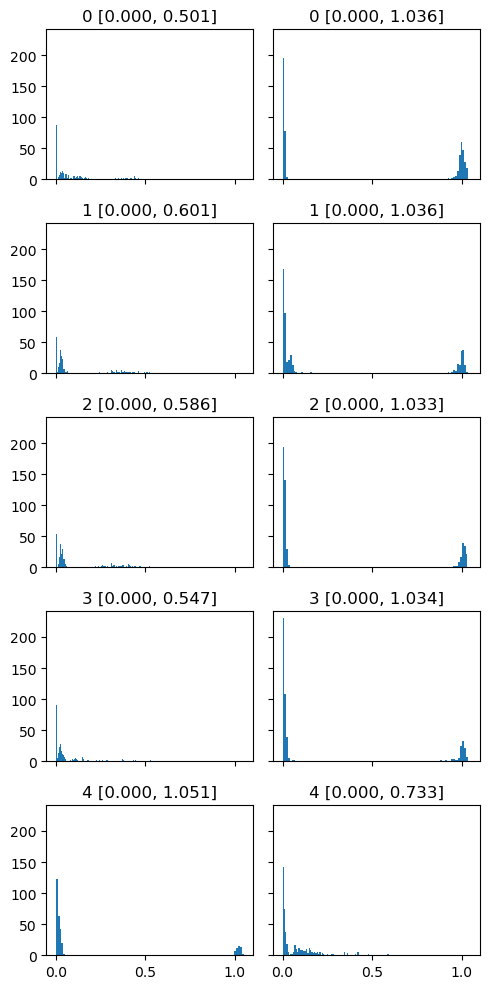

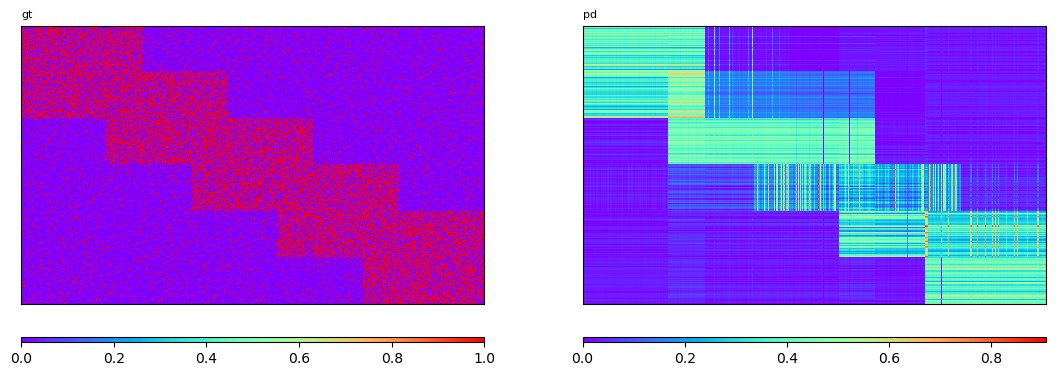

[I] model saved as: 24-06-25_23-48-58_BinaryMFPenalty.pickle


<Figure size 640x480 with 0 Axes>

In [20]:
from models import BinaryMFPenalty

max_iter = 30
min_diff = 1e-3
tol = 1e-1

model_bmfp = BinaryMFPenalty(k=k, U=U, V=V, W=W, reg=reg, reg_growth=reg_growth, init_method='custom', max_iter=max_iter, min_diff=min_diff, tol=tol, seed=2024)
model_bmfp.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='prediction', verbose=True, display=True)

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] u            : 0.1
[I] v            : 0.1
[I] link_lamda   : 10
[I] lamda        : 100
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] solver       : line-search
[I] init_method  : custom
[I] seed         : 1719330290
[I] verbose      : False
[I] display      : False
[I] task         : prediction
[I] Normalized U: [0.0, 0.9999999976714194] -> [0.0, 1.0], V: [0.0, 0.999999997829865] -> [0.0, 1.0]
[I] iter: 1, start: [0.100, 0.100], direction: [-0.238, -0.160]
[I] iter: 2, start: [0.011, 0.040], direction: [4856.896, 950.715]
[I] iter: 3, start: [1.000, 0.272], direction: [7220.207, 0.000]
[W] Stopped in advance: Difference lower than threshold


train  \
                                                                    0   
                time iter         u         v             F    Recall   
0  25/06/24 11:44:51    0  0.100000  0.100000  16084.798971  0.566298   
1  25/06/24 11:44:52    1  0.010717  0.039865  15814.728610  0.566298   
2  25/06/24 11:44:53    2  1.000000  0.271974  11066.440780  0.001419   
3  25/06/24 11:44:54    3  1.000000  0.271974  11066.440780  0.001419   

                                      val                                \
                                        0                                 
  Precision  Accuracy        F1    Recall Precision  Accuracy        F1   
0       1.0  0.566298  0.723104  0.531423       1.0  0.531423  0.694025   
1       1.0  0.566298  0.723104  0.531423       1.0  0.531423  0.694025   
2       1.0  0.001419  0.002835  0.000231       1.0  0.000231  0.000462   
3       1.0  0.001419  0.002835  0.000231       1.0  0.000231  0.000462   

       test                                
          0                                
     Recall Precision  Accuracy        F1  
0  0.513632       1.0  0.513632  0.678675  
1  0.513632       1.0  0.513632  0.678675  
2  0.000578       1.0  0.000578  0.001155  
3  0.000578       1.0  0.000578  0.001155

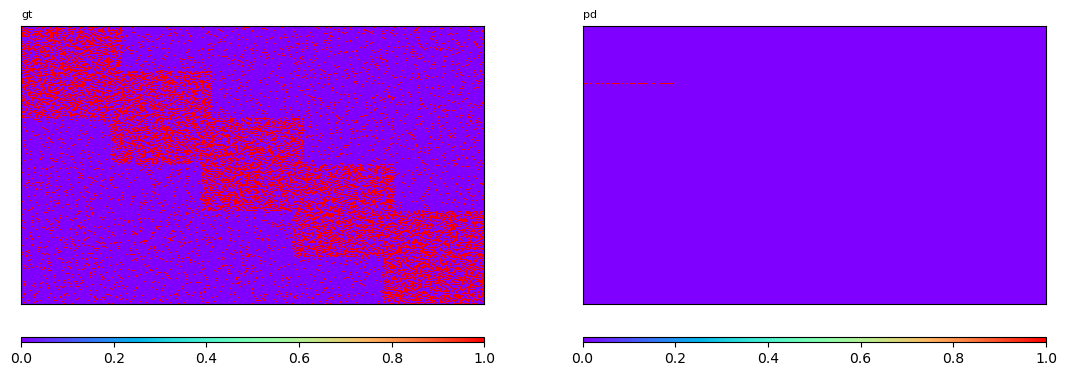

[I] model saved as: 24-06-25_23-44-54_BinaryMFThresholdExSigmoid.pickle


<Figure size 640x480 with 0 Axes>

In [9]:
from models import BinaryMFThresholdExSigmoid

model_bmfts_1 = BinaryMFThresholdExSigmoid(k=k, U=model_bmfp.U, V=model_bmfp.V, W=W, u=u, v=v, init_method='custom')
model_bmfts_1.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='prediction', verbose=False, display=False)

In [21]:
# from models import BinaryMFThresholdExSigmoidColumnwise

# us, vs = u, v

# model_bmftsc_1 = BinaryMFThresholdExSigmoidColumnwise(k=k, U=model_bmfp.U, V=model_bmfp.V, W=W, us=us, vs=vs, init_method='custom')
# model_bmftsc_1.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='prediction', verbose=False, display=False)

# 2. `BinaryMFPenaltyExSigmoid` + `BinaryMFThresholdExSigmoid`

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] reg          : 1
[I] tol          : 0.1
[I] min_diff     : 0.0001
[I] max_iter     : 100
[I] init_method  : custom
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] beta_loss    : frobenius
[I] solver       : mu
[I] link_lamda   : 10
[I] reg_growth   : 3.0
[I] task         : prediction
[I] display      : True
[I] Normalized U: [0.0, 1.0] -> [0.0, 1.0], V: [0.0, 1.0] -> [0.0, 1.0]
[W] Stopped in advance: Error lower than tolerance


\
                                                                      
                 time iter         error    rec_error           reg   
0   02/05/24 04:26:54    0  2.956692e+03  2934.305828  1.000000e+00   
1   02/05/24 04:26:54    1  2.665476e+03  2640.980212  1.000000e+00   
2   02/05/24 04:26:54    2  2.668397e+03  2601.436336  3.000000e+00   
3   02/05/24 04:26:54    3  2.833920e+03  2661.676325  9.000000e+00   
4   02/05/24 04:26:54    4  3.197956e+03  2778.380234  2.700000e+01   
5   02/05/24 04:26:54    5  3.909681e+03  2921.119855  8.100000e+01   
6   02/05/24 04:26:54    6  5.350931e+03  3048.234459  2.430000e+02   
7   02/05/24 04:26:55    7  8.514629e+03  3151.800721  7.290000e+02   
8   02/05/24 04:26:55    8  1.583218e+04  3239.937511  2.187000e+03   
9   02/05/24 04:26:55    9  3.318180e+04  3316.620123  6.561000e+03   
10  02/05/24 04:26:55   10  7.427776e+04  3383.991740  1.968300e+04   
11  02/05/24 04:26:55   11  1.726821e+05  3442.941849  5.904900e+04   
12  02/05/24 04:26:55   12  4.139636e+05  3494.008107  1.771470e+05   
13  02/05/24 04:26:55   13  1.006298e+06  3538.165788  5.314410e+05   
14  02/05/24 04:26:55   14  2.440250e+06  3576.586514  1.594323e+06   
15  02/05/24 04:26:55   15  5.843623e+06  3609.905203  4.782969e+06   
16  02/05/24 04:26:55   16  1.378868e+07  3638.094325  1.434891e+07   
17  02/05/24 04:26:55   17  3.232034e+07  3661.005064  4.304672e+07   
18  02/05/24 04:26:55   18  7.563576e+07  3678.823372  1.291402e+08   
19  02/05/24 04:26:55   19  1.762630e+08  3692.350857  3.874205e+08   
20  02/05/24 04:26:55   20  4.072985e+08  3702.416217  1.162261e+09   
21  02/05/24 04:26:55   21  9.291649e+08  3709.556403  3.486784e+09   
22  02/05/24 04:26:55   22  2.103469e+09  3714.369169  1.046035e+10   
23  02/05/24 04:26:55   23  4.884168e+09  3717.650168  3.138106e+10   
24  02/05/24 04:26:55   24  1.180798e+10  3720.128399  9.414318e+10   
25  02/05/24 04:26:55   25  2.898317e+10  3722.270800  2.824295e+11   
26  02/05/24 04:26:55   26  7.027544e+10  3724.175550  8.472886e+11   

                  train                 val                test            
                      0                   0                   0            
    reg_error      RMSE       MAE      RMSE       MAE      RMSE       MAE  
0   22.385696  0.861635  0.825982  0.902829  0.884374  0.900615  0.880726  
1   24.495874  0.736663  0.661226  0.799022  0.749989  0.801981  0.751477  
2   22.320160  0.753957  0.686643  0.819597  0.778220  0.818712  0.775010  
3   19.138223  0.770707  0.705310  0.833551  0.793028  0.833166  0.790937  
4   15.539848  0.796567  0.732842  0.854162  0.814133  0.854305  0.813291  
5   12.204457  0.821224  0.756986  0.872457  0.831156  0.873766  0.832536  
6    9.476119  0.837196  0.769412  0.883118  0.838294  0.886547  0.842858  
7    7.356417  0.845601  0.772495  0.887980  0.838047  0.893522  0.845776  
8    5.757771  0.850034  0.771108  0.889974  0.834477  0.896972  0.844790  
9    4.551926  0.852443  0.767931  0.890726  0.829915  0.898645  0.842281  
10   3.601777  0.853814  0.764299  0.890976  0.825416  0.899573  0.839430  
11   2.866080  0.854606  0.760725  0.891117  0.821446  0.900133  0.836605  
12   2.317113  0.855058  0.757405  0.891268  0.818092  0.900446  0.833926  
13   1.886869  0.855353  0.754451  0.891425  0.815297  0.900586  0.831416  
14   1.528343  0.855622  0.751887  0.891598  0.812996  0.900609  0.829076  
15   1.221002  0.855904  0.749697  0.891830  0.811134  0.900618  0.826982  
16   0.960703  0.856179  0.747892  0.892132  0.809648  0.900705  0.825247  
17   0.750735  0.856442  0.746472  0.892455  0.808488  0.900891  0.823945  
18   0.585659  0.856688  0.745398  0.892760  0.807618  0.901144  0.823059  
19   0.454956  0.856922  0.744610  0.893043  0.807001  0.901424  0.822491  
20   0.350433  0.857125  0.744029  0.893283  0.806570  0.901674  0.822110  
21   0.266481  0.857263  0.743583  0.893443  0.806254  0.901840  0.821812  
22   0.201089  0.857340  0.743244  0.8

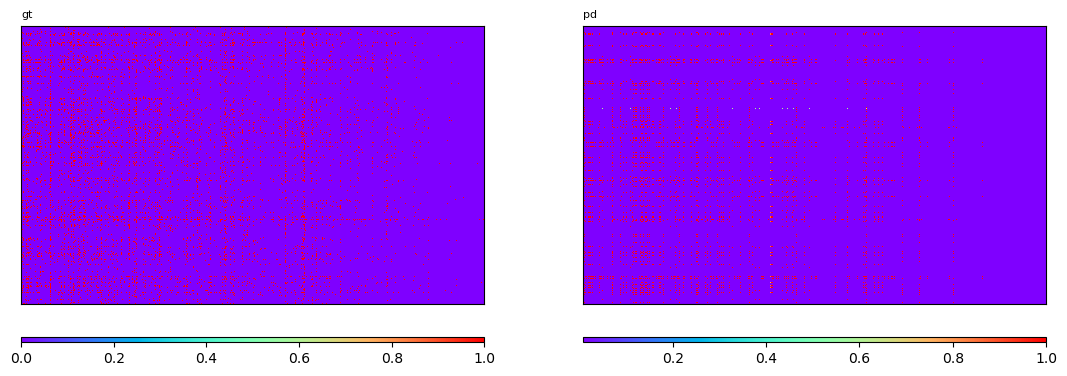

In [ ]:
from models import PNLPF

max_iter = 100
min_diff = 1e-4
tol = 1e-1

k = 5
reg = 1
reg_growth = 3.0
W = 'full'

model_bmfps = PNLPF(k=k, U=U, V=V, W=W, reg=reg, reg_growth=reg_growth, init_method='custom', max_iter=max_iter, min_diff=min_diff, tol=tol, seed=2024)
model_bmfps.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='prediction', verbose=False, display=True)

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] init_method  : custom
[I] seed         : 1714638416
[I] verbose      : False
[I] display      : False
[I] u            : 0.1
[I] v            : 0.1
[I] lamda        : 100
[I] link_lamda   : 10
[I] task         : prediction
[I] Normalized U: [0.0, 1.000015762585952] -> [0.0, 1.0], V: [0.0, 1.0000103996024179] -> [0.0, 1.0]
[I] iter: 1, start: [0.100, 0.100], direction: [-0.945, -0.326]
[I] iter: 2, start: [0.017, 0.071], direction: [1.000, 0.000]
[I] iter: 3, start: [0.021, 0.071], direction: [-1.000, -0.003]
[I] iter: 4, start: [0.019, 0.071], direction: [-1.000, -0.008]
[W] Stopped in advance: Difference lower than threshold


train  \
                                                                   0   
                time iter         u         v            F    Recall   
0  02/05/24 04:26:56    0  0.100000  0.100000  3740.694850  0.256277   
1  02/05/24 04:26:56    1  0.016901  0.071377  3640.087086  0.256277   
2  02/05/24 04:26:56    2  0.020807  0.071379  3638.041244  0.256277   
3  02/05/24 04:26:57    3  0.018854  0.071373  3617.908991  0.256277   
4  02/05/24 04:26:57    4  0.018365  0.071369  3617.127475  0.256277   

                                    val                                \
                                      0                                 
  Precision Accuracy        F1   Recall Precision  Accuracy        F1   
0  0.845311  0.60469  0.393312  0.19145  0.801556  0.572026  0.309077   
1  0.845311  0.60469  0.393312  0.19145  0.801556  0.572026  0.309077   
2  0.845311  0.60469  0.393312  0.19145  0.801556  0.572026  0.309077   
3  0.845311  0.60469  0.393312  0.19145  0.801556  0.572026  0.309077   
4  0.845311  0.60469  0.393312  0.19145  0.801556  0.572026  0.309077   

       test                                
          0                                
     Recall Precision  Accuracy        F1  
0  0.176662  0.811966  0.567875  0.290187  
1  0.176662  0.811966  0.567875  0.290187  
2  0.176662  0.811966  0.567875  0.290187  
3  0.176662  0.811966  0.567875  0.290187  
4  0.176662  0.811966  0.567875  0.290187

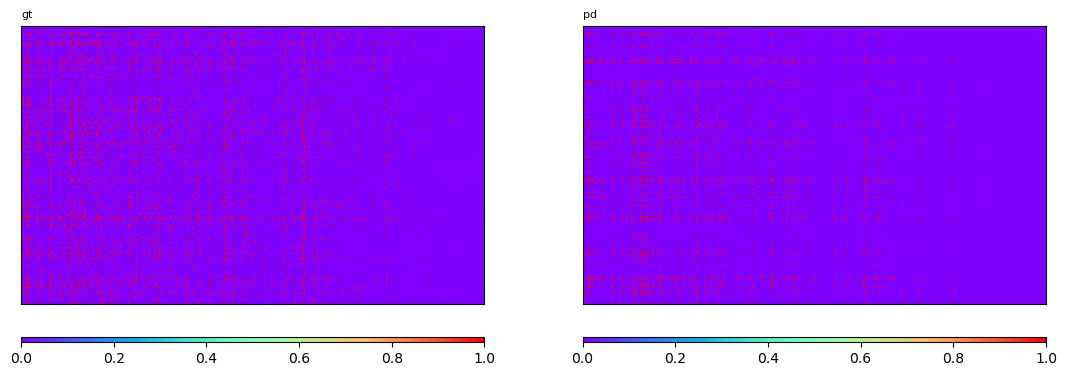

In [ ]:
from models import BinaryMFThresholdExSigmoid

model_bmfts_2 = BinaryMFThresholdExSigmoid(k=k, U=model_bmfps.U, V=model_bmfps.V, W=W, u=u, v=v, init_method='custom')
model_bmfts_2.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='prediction', verbose=False, display=False)